   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


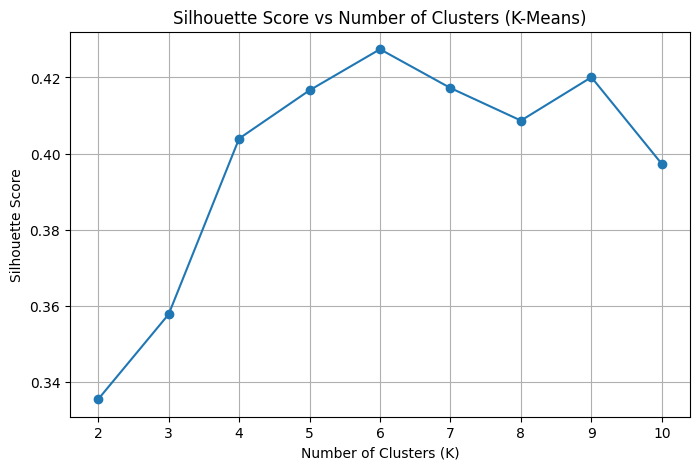

Optimal number of clusters (K-Means): 6
K-Means Cluster Summary:
                     Age  Annual Income (k$)  Spending Score (1-100)
KMeansCluster                                                       
0              41.939394           88.939394               16.969697
1              56.333333           54.266667               49.066667
2              25.250000           25.833333               76.916667
3              32.692308           86.538462               82.128205
4              26.684211           57.578947               47.789474
5              45.523810           26.285714               19.380952


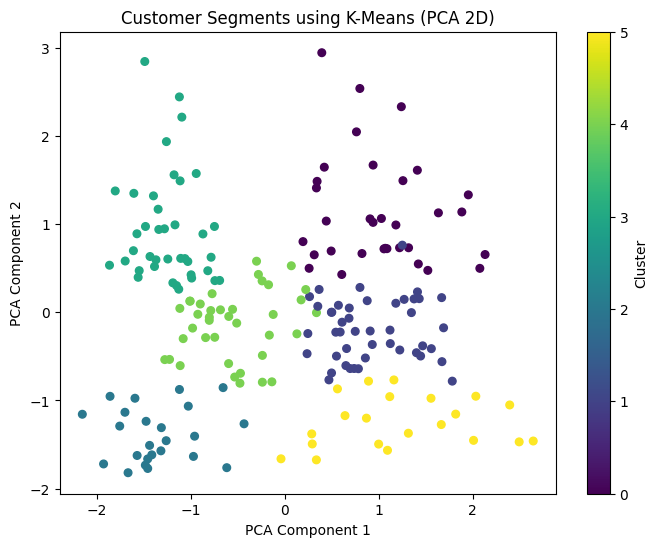

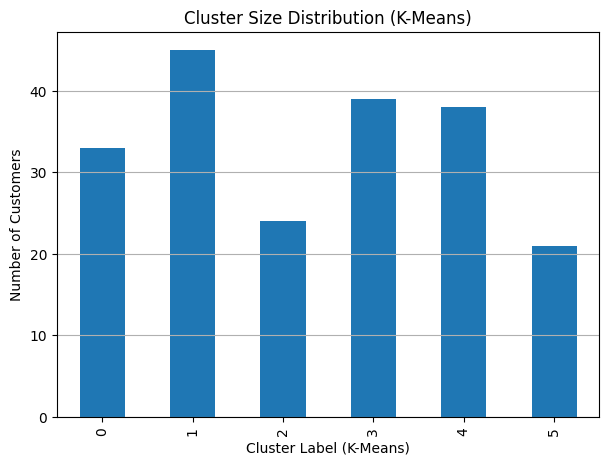

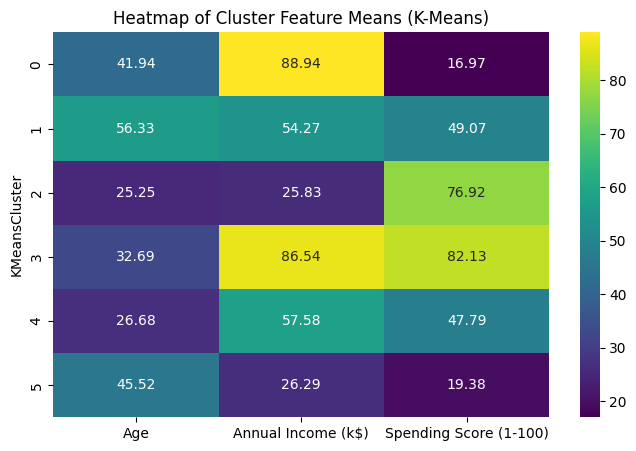

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

# 2. Data Cleaning & Preparation
print(df.isnull().sum())
df = df.dropna()

# 3. Feature Selection
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5 & 7. Hyperparameter tuning: choose K using silhouette score
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        max_iter=300,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (K-Means)")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (K-Means):", best_k)

# 7. Final model training
kmeans_final = KMeans(
    n_clusters=best_k,
    init="k-means++",
    n_init=30,
    max_iter=300,
    random_state=42
)
df["KMeansCluster"] = kmeans_final.fit_predict(X_scaled)

# 8. Cluster Profiling
cluster_summary = df.groupby("KMeansCluster")[features].mean()
print("K-Means Cluster Summary:")
print(cluster_summary)

# 9. PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["KMeansCluster"],
    cmap="viridis",
    s=30
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments using K-Means (PCA 2D)")
plt.colorbar(label="Cluster")
plt.show()

cluster_counts = df["KMeansCluster"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
cluster_counts.plot(kind="bar")
plt.xlabel("Cluster Label (K-Means)")
plt.ylabel("Number of Customers")
plt.title("Cluster Size Distribution (K-Means)")
plt.grid(axis="y")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, cmap="viridis", annot=True, fmt=".2f")
plt.title("Heatmap of Cluster Feature Means (K-Means)")
plt.show()


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


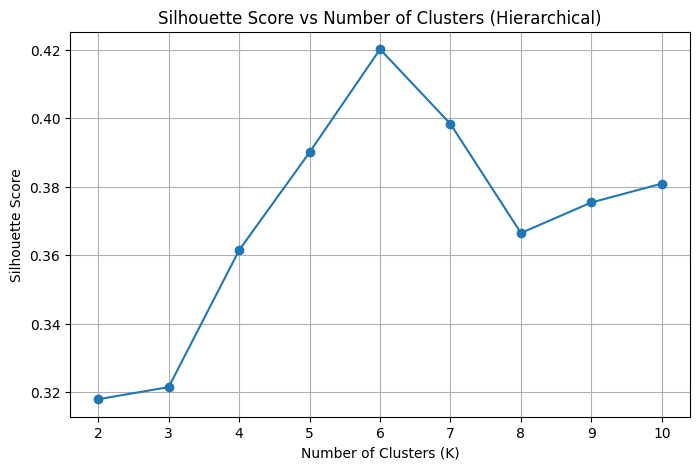

Optimal number of clusters (Hierarchical): 6
Hierarchical Cluster Summary:
                   Age  Annual Income (k$)  Spending Score (1-100)
HierCluster                                                       
0            27.377778           57.511111               45.844444
1            56.400000           55.288889               48.355556
2            32.692308           86.538462               82.128205
3            43.892857           91.285714               16.678571
4            44.318182           25.772727               20.272727
5            24.809524           25.619048               80.238095


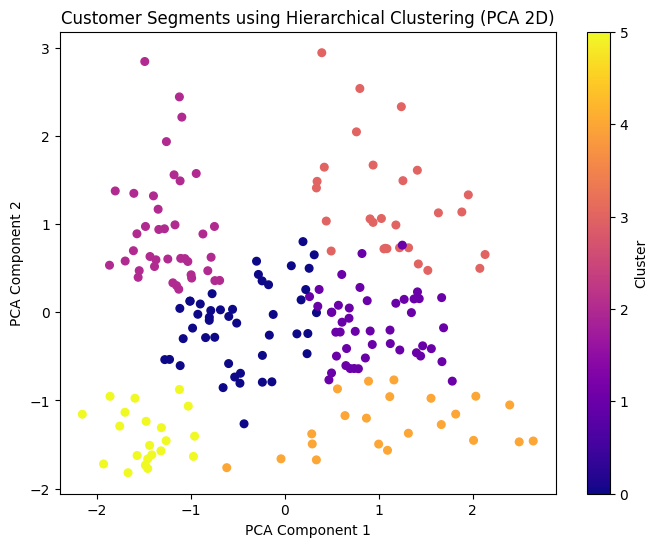

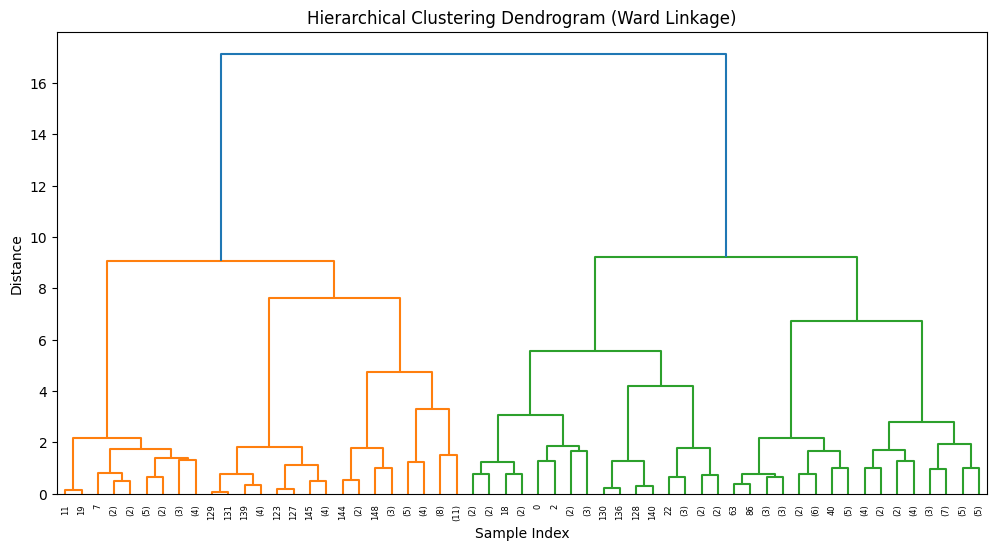

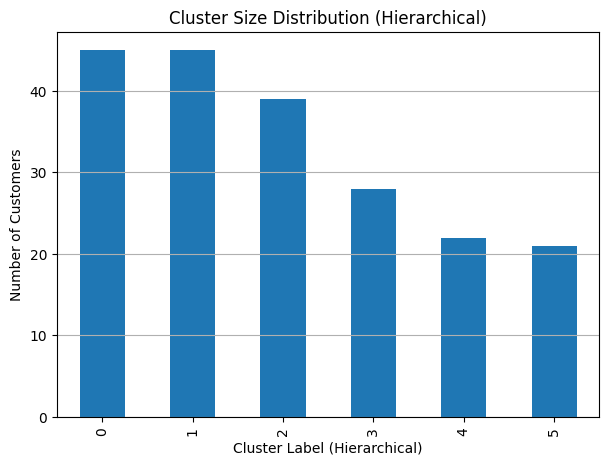

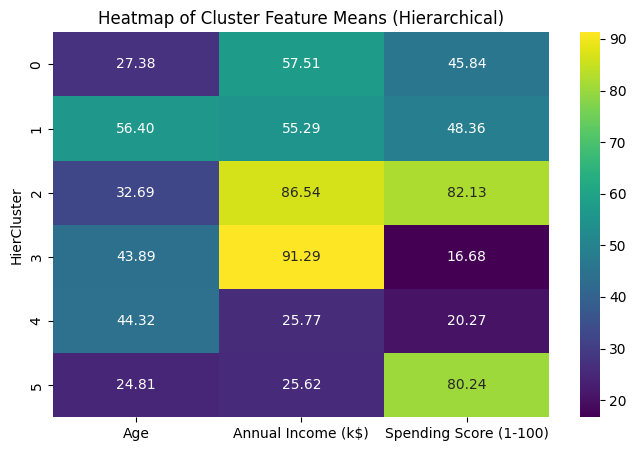

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

# 2. Data Cleaning & Preparation
print(df.isnull().sum())
df = df.dropna()

# 3. Feature Selection
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5 & 7. Hyperparameter tuning: choose K using silhouette score
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    model = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (Hierarchical)")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (Hierarchical):", best_k)

# 7. Final hierarchical model
hierarchical_model = AgglomerativeClustering(
    n_clusters=best_k,
    linkage="ward"
)
df["HierCluster"] = hierarchical_model.fit_predict(X_scaled)

# 8. Cluster Profiling
cluster_summary = df.groupby("HierCluster")[features].mean()
print("Hierarchical Cluster Summary:")
print(cluster_summary)

# 9. PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["HierCluster"],
    cmap="plasma",
    s=30
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments using Hierarchical Clustering (PCA 2D)")
plt.colorbar(label="Cluster")
plt.show()

sample = X_scaled[:150]
linked = linkage(sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

cluster_counts = df["HierCluster"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
cluster_counts.plot(kind="bar")
plt.xlabel("Cluster Label (Hierarchical)")
plt.ylabel("Number of Customers")
plt.title("Cluster Size Distribution (Hierarchical)")
plt.grid(axis="y")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, cmap="viridis", annot=True, fmt=".2f")
plt.title("Heatmap of Cluster Feature Means (Hierarchical)")
plt.show()
